In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# IHC Experiment

In [3]:
ihc_metab_md = pd.read_table('../data/Metabolome/longIHC_metab_metadata_cleaned.txt', sep='\t', index_col=0)
ihc_metab_md

,filename,micro-sample-id,cage_food_consumption_g,cage_location,cage_number,diet,exposure_type,genotype,host_age,host_age_units,host_subject_id,host_weight,host_weight_units,mouse_number,sample_type
sample-id,,,,,,,,,,,,,,,
A15_85_01,A15_85_01.mzXML,11548.A15.85.1,not applicable,On shelf,A15,Regular chow,Air,ApoE KO,10.0,weeks,Mouse 85,26.5,g,85,feces
A15_85_02,A15_85_02.mzXML,11548.A15.85.2,56.6,On shelf,A15,Regular chow,Air,ApoE KO,10.5,weeks,Mouse 85,26.7,g,85,feces
A15_85_03,A15_85_03.mzXML,11548.A15.85.3,85.9,On shelf,A15,Regular chow,Air,ApoE KO,11.0,weeks,Mouse 85,27.2,g,85,feces
A15_85_04,A15_85_04.mzXML,11548.A15.85.4,59.3,On shelf,A15,Regular chow,Air,ApoE KO,11.5,weeks,Mouse 85,27.4,g,85,feces
A15_85_05,A15_85_05.mzXML,11548.A15.85.5,81,On shelf,A15,Regular chow,Air,ApoE KO,12.0,weeks,Mouse 85,27.6,g,85,feces
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Blank_G1_5uL_PreTP15_01,Blank_G1_5uL_PreTP15_01.mzXML,not applicable,Not provided,not applicable,not applicable,not applicable,not applicable,not applicable,0.0,weeks,not applicable,Not provided,not applicable,0,not applicable
Blank_G1_5uL_PreTP15_02,Blank_G1_5uL_PreTP15_02.mzXML,not applicable,Not provided,not applicable,not applicable,not applicable,not applicable,not applicable,0.0,weeks,not applicable,Not provided,not applicable,0,not applicable
Blank_G1_5uL_PreTP20_01,Blank_G1_5uL_PreTP20_01.mzXML,not applicable,Not provided,not applicable,not applicable,not applicable,not applicable,not applicable,0.0,weeks,not applicable,Not provided,not applicable,0,not applicable


In [4]:
ihc_metab_mols = pd.read_table('../data/Metabolome/longIHC_allunique_noblanks_sum_counts.txt', sep='\t', index_col=0)
ihc_metab_mols.head()

,"(2S,3S,4S,5R,6R)-6-[[(3S,4S,6aR,6bS,8aR,9R,12aS,14bR)-9-hydroxy-4-(hydroxymethyl)-4,6a,6b,8a,11,11,14b-heptamethyl-1,2,3,4a,5,6,7,8,9,10,12,12a,14,14a-tetradecahydropicen-3-yl]oxy]-5-[(2S,3R,4S,5R,6R)-4,5-dihydroxy-6-(hydroxymethyl)-3-[(2S,3R,4R,5R,6S)-3,4,5-trihydroxy-6-methyloxan-2-yl]oxyoxan-2-yl]oxy-3,4-dihydroxyoxane-2-carboxylic acid","(2S,4R)-4-((3R,5S,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)-2-hydroxypentanoic acid","(4R)-4-((1R,3S,5S,7R,9S,10S,12S,13R,14S,17R)-1,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6R,7S,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6R,7S,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4aR,5S)-9,9a-dihydroxy-3,4a,5-trimethyl-5,6,7,8,8a,9-hexahydro-4H-benzo[f][1]benzofuran-2-one","(R)-4-((3R,5R,8R,9S,10S,12S,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pent-2-enoic acid",...,a-Muricholic acid,alpha-TOCHOPHERYL ACETATE,b-Muricholic acid,cordycepin,hyocholic acid,"methyl (4R)-4-((3R,5S,7R,9S,10S,13R,15R,17R)-3,7,15-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoate",sphingosin C16 (Artifact)-emf,taurocholic acid,taurohyodeoxycholic acid,tauroursodeoxycholic acid
A15_85_15,4.347014e+06,4.365013e+05,3.113129e+06,7.643170e+06,8.333160e+06,3.105617e+07,1.764193e+07,1.316531e+07,29758.827594,6.768136e+06,...,2.050625e+07,0.0,2.226068e+07,2.153714e+07,7.557172e+05,1.189346e+07,4.386402e+07,8.742650e+05,2.131643e+05,0.000000
A15_86_01,6.162584e+06,1.929600e+07,9.248853e+06,1.671268e+07,3.592560e+07,1.598971e+08,1.184836e+08,1.029479e+08,70848.402187,3.520016e+07,...,2.224914e+08,0.0,4.599753e+08,1.086849e+08,9.029585e+06,1.454446e+08,3.501207e+07,1.957585e+06,5.283425e+06,80722.124555
A15_86_15,3.773914e+06,1.334396e+05,7.236250e+05,3.936169e+06,1.475118e+07,1.376922e+07,4.943581e+06,2.040354e+07,34407.511004,7.293671e+06,...,2.137246e+08,0.0,2.413675e+07,2.325193e+07,2.942093e+06,8.638876e+06,5.019532e+07,6.688261e+05,3.792855e+04,0.000000
A15_85_10,3.006859e+07,1.703983e+06,6.540154e+06,8.387228e+06,8.639797e+06,2.926899e+07,3.393049e+07,6.837407e+07,0.000000,2.277938e+07,...,1.405377e+08,0.0,1.389608e+08,6.475354e+07,2.988641e+05,2.476160e+07,3.164700e+07,4.734618e+05,4.367727e+05,0.000000
A15_86_10,6.716596e+06,1.667015e+05,5.333426e+06,1.054720e+07,2.291112e+07,1.192051e+07,8.587482e+06,6.986774e+07,145728.305689,2.414387e+07,...,1.987014e+08,0.0,7.547292e+07,3.449575e+07,6.932378e+05,1.750634e+07,3.345745e+07,4.218966e+05,4.714934e+05,0.000000


In [5]:
ihc_mols_counts = pd.merge(ihc_metab_mols, ihc_metab_md, left_index=True, right_index=True)
ihc_mols_counts.head()

,"(2S,3S,4S,5R,6R)-6-[[(3S,4S,6aR,6bS,8aR,9R,12aS,14bR)-9-hydroxy-4-(hydroxymethyl)-4,6a,6b,8a,11,11,14b-heptamethyl-1,2,3,4a,5,6,7,8,9,10,12,12a,14,14a-tetradecahydropicen-3-yl]oxy]-5-[(2S,3R,4S,5R,6R)-4,5-dihydroxy-6-(hydroxymethyl)-3-[(2S,3R,4R,5R,6S)-3,4,5-trihydroxy-6-methyloxan-2-yl]oxyoxan-2-yl]oxy-3,4-dihydroxyoxane-2-carboxylic acid","(2S,4R)-4-((3R,5S,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)-2-hydroxypentanoic acid","(4R)-4-((1R,3S,5S,7R,9S,10S,12S,13R,14S,17R)-1,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6R,7S,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6R,7S,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4aR,5S)-9,9a-dihydroxy-3,4a,5-trimethyl-5,6,7,8,8a,9-hexahydro-4H-benzo[f][1]benzofuran-2-one","(R)-4-((3R,5R,8R,9S,10S,12S,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pent-2-enoic acid",...,diet,exposure_type,genotype,host_age,host_age_units,host_subject_id,host_weight,host_weight_units,mouse_number,sample_type
A15_85_15,4.347014e+06,4.365013e+05,3.113129e+06,7.643170e+06,8.333160e+06,3.105617e+07,1.764193e+07,1.316531e+07,29758.827594,6.768136e+06,...,Regular chow,Air,ApoE KO,17.0,weeks,Mouse 85,30.5,g,85,feces
A15_86_01,6.162584e+06,1.929600e+07,9.248853e+06,1.671268e+07,3.592560e+07,1.598971e+08,1.184836e+08,1.029479e+08,70848.402187,3.520016e+07,...,Regular chow,Air,ApoE KO,10.0,weeks,Mouse 86,27,g,86,feces
A15_86_15,3.773914e+06,1.334396e+05,7.236250e+05,3.936169e+06,1.475118e+07,1.376922e+07,4.943581e+06,2.040354e+07,34407.511004,7.293671e+06,...,Regular chow,Air,ApoE KO,17.0,weeks,Mouse 86,28.4,g,86,feces
A15_85_10,3.006859e+07,1.703983e+06,6.540154e+06,8.387228e+06,8.639797e+06,2.926899e+07,3.393049e+07,6.837407e+07,0.000000,2.277938e+07,...,Regular chow,Air,ApoE KO,14.5,weeks,Mouse 85,28.7,g,85,feces
A15_86_10,6.716596e+06,1.667015e+05,5.333426e+06,1.054720e+07,2.291112e+07,1.192051e+07,8.587482e+06,6.986774e+07,145728.305689,2.414387e+07,...,Regular chow,Air,ApoE KO,14.5,weeks,Mouse 86,27.9,g,86,feces


# IH_IC Experiment

In [6]:
ihic_metab_md = pd.read_table('../data/Metabolome/Haddad_IH_IC_MetaData.txt', sep='\t', index_col=0)
ihic_metab_md.head()

,qiita_name,age_units,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,collection_timestamp,description,diet,...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
sample-id,,,,,,,,,,,,,,,,,,,,,
A34_135_1,11829.A34.135.1,weeks,A34.135.1,Not applicable,On shelf,NaN,A34,4/3/18 12:00,Mouse 135 baseline stool collection 1 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_135_10,11829.A34.135.10,weeks,A34.135.10,18,On shelf,NaN,A34a,5/4/18 12:00,Mouse 135 stool collection 10 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_135_11,11829.A34.135.11,weeks,A34.135.11,23.9,On shelf,NaN,A34a,5/8/18 12:00,Mouse 135 stool collection 11 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_135_12,11829.A34.135.12,weeks,A34.135.12,17.4,On shelf,NaN,A34a,5/11/18 12:00,Mouse 135 stool collection 12 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_135_13,11829.A34.135.13,weeks,A34.135.13,23.1,On shelf,NaN,A34a,5/15/18 12:00,Mouse 135 stool collection 13 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


In [7]:
ihic_metab_mols = pd.read_table('../data/Metabolome/longIHIC_allunique_noblanks_sum_counts.txt', sep='\t', index_col=0)
ihic_metab_mols.head()

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,Ursodeoxycholic acid,a-Muricholic acid,b-Muricholic acid,gmelinol,hyocholic acid,sphingosin C16 (Artifact)-emf,taurocholic acid,taurohyodeoxycholic acid,threonine conjugated cholic acid,xanthohumol
A36_144_2,1.002163e+08,1.856405e+07,8.463912e+06,3.319759e+06,1.265182e+07,3.785004e+06,3.230452e+07,3.859170e+07,19028.101518,5.889367e+05,...,5.447380e+05,4.754706e+07,2.599903e+07,2.206346e+06,1.011364e+06,2.786164e+07,4.396711e+06,1.011104e+06,48608.258212,8.429734e+06
A36_145_2,1.123705e+08,2.344882e+07,9.693180e+06,7.968814e+06,1.138696e+07,1.036950e+07,3.874929e+07,2.371343e+07,38995.306094,5.514609e+05,...,7.017376e+05,9.751392e+07,5.984692e+07,1.907400e+06,3.057336e+06,8.443697e+06,9.618206e+06,1.340127e+06,319393.855140,4.012935e+06
A36_146_2,1.122715e+08,2.633132e+07,1.179041e+07,5.038230e+06,9.808144e+06,2.777913e+06,3.864718e+07,3.634443e+07,42455.039250,4.033666e+05,...,1.914244e+06,7.573564e+07,4.551782e+07,3.134868e+06,2.846551e+06,2.811215e+07,6.517472e+06,1.309515e+06,89796.334025,4.977158e+06
A36_145_1,3.022880e+07,9.842834e+06,4.894182e+06,9.553708e+05,5.234213e+06,5.836308e+05,6.675492e+06,1.298713e+07,0.000000,1.257660e+07,...,1.119788e+05,2.866872e+07,7.867828e+06,2.524832e+07,8.514613e+05,2.995528e+07,2.123593e+06,2.603801e+05,50797.715572,1.147515e+07
A35_139_1,3.152146e+07,3.591568e+06,4.238519e+05,6.711237e+05,9.099309e+05,4.790608e+06,6.024970e+06,8.889273e+06,0.000000,1.964680e+07,...,3.306013e+04,3.578768e+07,4.911409e+06,4.718870e+07,8.895797e+05,2.859685e+07,3.693999e+06,8.645017e+05,63631.407920,1.386217e+07


In [8]:
ihic_mols_counts = pd.merge(ihic_metab_mols, ihic_metab_md, left_index=True, right_index=True)
ihic_mols_counts.head()

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
A36_144_2,1.002163e+08,1.856405e+07,8.463912e+06,3.319759e+06,1.265182e+07,3.785004e+06,3.230452e+07,3.859170e+07,19028.101518,5.889367e+05,...,Mouse 144,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_2,1.123705e+08,2.344882e+07,9.693180e+06,7.968814e+06,1.138696e+07,1.036950e+07,3.874929e+07,2.371343e+07,38995.306094,5.514609e+05,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_146_2,1.122715e+08,2.633132e+07,1.179041e+07,5.038230e+06,9.808144e+06,2.777913e+06,3.864718e+07,3.634443e+07,42455.039250,4.033666e+05,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_1,3.022880e+07,9.842834e+06,4.894182e+06,9.553708e+05,5.234213e+06,5.836308e+05,6.675492e+06,1.298713e+07,0.000000,1.257660e+07,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A35_139_1,3.152146e+07,3.591568e+06,4.238519e+05,6.711237e+05,9.099309e+05,4.790608e+06,6.024970e+06,8.889273e+06,0.000000,1.964680e+07,...,Mouse 139,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


## IH vs Air

In [9]:
ih_mols_counts = ihic_mols_counts[ihic_mols_counts['exposure_type'] != 'IC'].copy()
ih_mols_counts.head()

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
A36_144_2,1.002163e+08,1.856405e+07,8.463912e+06,3.319759e+06,1.265182e+07,3.785004e+06,3.230452e+07,3.859170e+07,19028.101518,5.889367e+05,...,Mouse 144,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_2,1.123705e+08,2.344882e+07,9.693180e+06,7.968814e+06,1.138696e+07,1.036950e+07,3.874929e+07,2.371343e+07,38995.306094,5.514609e+05,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_146_2,1.122715e+08,2.633132e+07,1.179041e+07,5.038230e+06,9.808144e+06,2.777913e+06,3.864718e+07,3.634443e+07,42455.039250,4.033666e+05,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_1,3.022880e+07,9.842834e+06,4.894182e+06,9.553708e+05,5.234213e+06,5.836308e+05,6.675492e+06,1.298713e+07,0.000000,1.257660e+07,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A35_139_1,3.152146e+07,3.591568e+06,4.238519e+05,6.711237e+05,9.099309e+05,4.790608e+06,6.024970e+06,8.889273e+06,0.000000,1.964680e+07,...,Mouse 139,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


## IC vs Air

In [10]:
ic_mols_counts = ihic_mols_counts[ihic_mols_counts['exposure_type'] != 'IH'].copy()
ic_mols_counts.head()

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
A35_139_1,3.152146e+07,3.591568e+06,4.238519e+05,6.711237e+05,9.099309e+05,4.790608e+06,6.024970e+06,8.889273e+06,0.000000,1.964680e+07,...,Mouse 139,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_137_1,5.280343e+07,2.398377e+07,3.665637e+06,6.454591e+06,9.228489e+06,6.299842e+06,4.532091e+06,1.362564e+07,58469.661773,1.574261e+07,...,Mouse 137,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A35_140_16,5.164272e+06,2.388383e+07,1.085880e+07,1.579247e+06,5.203620e+05,8.717172e+05,2.380149e+06,9.085838e+06,0.000000,1.448334e+07,...,Mouse 140,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_137_6,2.710992e+07,1.127641e+07,2.768617e+06,4.734057e+06,2.765285e+06,1.850470e+07,4.886382e+06,9.623311e+06,0.000000,1.684123e+07,...,Mouse 137,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A35_142_16,3.863343e+06,2.471223e+06,6.405551e+05,7.802585e+04,1.129346e+06,1.443871e+06,7.879241e+05,7.476065e+06,0.000000,1.842598e+07,...,Mouse 142,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


## IH vs IC

In [11]:
noAir_mols_counts = ihic_mols_counts[ihic_mols_counts['exposure_type'] != 'Air'].copy()
noAir_mols_counts.head()

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
A36_144_2,1.002163e+08,1.856405e+07,8.463912e+06,3.319759e+06,1.265182e+07,3.785004e+06,3.230452e+07,3.859170e+07,19028.101518,5.889367e+05,...,Mouse 144,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_2,1.123705e+08,2.344882e+07,9.693180e+06,7.968814e+06,1.138696e+07,1.036950e+07,3.874929e+07,2.371343e+07,38995.306094,5.514609e+05,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_146_2,1.122715e+08,2.633132e+07,1.179041e+07,5.038230e+06,9.808144e+06,2.777913e+06,3.864718e+07,3.634443e+07,42455.039250,4.033666e+05,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_1,3.022880e+07,9.842834e+06,4.894182e+06,9.553708e+05,5.234213e+06,5.836308e+05,6.675492e+06,1.298713e+07,0.000000,1.257660e+07,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_146_11,1.068367e+08,1.176768e+08,3.398389e+08,1.603579e+07,2.029873e+07,1.015810e+07,4.475855e+07,6.625351e+07,267009.199492,3.079460e+05,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


# Pie Charts

## IHC

In [12]:
moles = pd.read_csv('../data/Metabolome/longIHC_allunique_noblanks_sum_counts.txt', sep='\t', index_col=0)
moles.head()
#raw values

,"(2S,3S,4S,5R,6R)-6-[[(3S,4S,6aR,6bS,8aR,9R,12aS,14bR)-9-hydroxy-4-(hydroxymethyl)-4,6a,6b,8a,11,11,14b-heptamethyl-1,2,3,4a,5,6,7,8,9,10,12,12a,14,14a-tetradecahydropicen-3-yl]oxy]-5-[(2S,3R,4S,5R,6R)-4,5-dihydroxy-6-(hydroxymethyl)-3-[(2S,3R,4R,5R,6S)-3,4,5-trihydroxy-6-methyloxan-2-yl]oxyoxan-2-yl]oxy-3,4-dihydroxyoxane-2-carboxylic acid","(2S,4R)-4-((3R,5S,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)-2-hydroxypentanoic acid","(4R)-4-((1R,3S,5S,7R,9S,10S,12S,13R,14S,17R)-1,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6R,7S,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6R,7S,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4aR,5S)-9,9a-dihydroxy-3,4a,5-trimethyl-5,6,7,8,8a,9-hexahydro-4H-benzo[f][1]benzofuran-2-one","(R)-4-((3R,5R,8R,9S,10S,12S,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pent-2-enoic acid",...,a-Muricholic acid,alpha-TOCHOPHERYL ACETATE,b-Muricholic acid,cordycepin,hyocholic acid,"methyl (4R)-4-((3R,5S,7R,9S,10S,13R,15R,17R)-3,7,15-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoate",sphingosin C16 (Artifact)-emf,taurocholic acid,taurohyodeoxycholic acid,tauroursodeoxycholic acid
A15_85_15,4.347014e+06,4.365013e+05,3.113129e+06,7.643170e+06,8.333160e+06,3.105617e+07,1.764193e+07,1.316531e+07,29758.827594,6.768136e+06,...,2.050625e+07,0.0,2.226068e+07,2.153714e+07,7.557172e+05,1.189346e+07,4.386402e+07,8.742650e+05,2.131643e+05,0.000000
A15_86_01,6.162584e+06,1.929600e+07,9.248853e+06,1.671268e+07,3.592560e+07,1.598971e+08,1.184836e+08,1.029479e+08,70848.402187,3.520016e+07,...,2.224914e+08,0.0,4.599753e+08,1.086849e+08,9.029585e+06,1.454446e+08,3.501207e+07,1.957585e+06,5.283425e+06,80722.124555
A15_86_15,3.773914e+06,1.334396e+05,7.236250e+05,3.936169e+06,1.475118e+07,1.376922e+07,4.943581e+06,2.040354e+07,34407.511004,7.293671e+06,...,2.137246e+08,0.0,2.413675e+07,2.325193e+07,2.942093e+06,8.638876e+06,5.019532e+07,6.688261e+05,3.792855e+04,0.000000
A15_85_10,3.006859e+07,1.703983e+06,6.540154e+06,8.387228e+06,8.639797e+06,2.926899e+07,3.393049e+07,6.837407e+07,0.000000,2.277938e+07,...,1.405377e+08,0.0,1.389608e+08,6.475354e+07,2.988641e+05,2.476160e+07,3.164700e+07,4.734618e+05,4.367727e+05,0.000000
A15_86_10,6.716596e+06,1.667015e+05,5.333426e+06,1.054720e+07,2.291112e+07,1.192051e+07,8.587482e+06,6.986774e+07,145728.305689,2.414387e+07,...,1.987014e+08,0.0,7.547292e+07,3.449575e+07,6.932378e+05,1.750634e+07,3.345745e+07,4.218966e+05,4.714934e+05,0.000000


In [13]:
sum_total = moles.values.sum()

In [14]:
bile_acids = [col for col in moles.columns if 'holic' in col]
new_bile_acids = [col for col in moles.columns if 'cyclopenta[a]phenanthren' in col]
all_bile_acids = bile_acids + new_bile_acids
all_bile_acids

['Alanine conjugated cholic acid',
 'Cholic acid',
 'Deoxycholic acid',
 'Hyodeoxycholic acid',
 'Lithocholic acid',
 'Spectral Match to 12-Ketodeoxycholic acid from NIST14',
 'Spectral Match to Cholic acid from NIST14',
 'Spectral Match to Tauroursodeoxycholic acid from NIST14',
 'Spectral Match to Ursodeoxycholic acid from NIST14',
 'Tauro-b-muricholic acid',
 'Taurocholic Acid Sulfate',
 'Taurocholic acid',
 'Taurodeoxycholic acid',
 'Ursodeoxycholic acid',
 'a-Muricholic acid',
 'b-Muricholic acid',
 'hyocholic acid',
 'taurocholic acid',
 'taurohyodeoxycholic acid',
 'tauroursodeoxycholic acid',
 '(2S,4R)-4-((3R,5S,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)-2-hydroxypentanoic acid',
 '(4R)-4-((1R,3S,5S,7R,9S,10S,12S,13R,14S,17R)-1,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid',
 '(4R)-4-((3R,5R,6R,7S,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1

In [15]:
BAs = moles[all_bile_acids].values.sum()

In [16]:
cholines = [col for col in moles.columns if 'choline' in col]
more_cholines = [col for col in moles.columns if 'PC' in col]
all_cholines = cholines + more_cholines
all_cholines

['ReSpect:PS081304 1-Lauroyl-2-Hydroxy-sn-Glycero-3-Phosphocholine|12:0 LysoPC|1-Dodecanoyllysolecithin|Phosphocholine,1-Lauroyl-2-Hydroxy-sn-Glycero-3-',
 'Spectral Match to 1,2-Dipalmitoleoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-(1Z-Hexadecenyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-(9Z-Octadecenoyl)-2-tetradecanoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Heptadecanoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecanoyl-2-(9Z-octadecenoyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecanoyl-2-octadecadienoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecanoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecyl-2-(9Z-octadecenoyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecyl-sn-glycero-3-phosphocholine fr

In [17]:
PPC = moles[all_cholines].values.sum()

In [18]:
carnitines = [col for col in moles.columns if 'carnit' in col]
carnitines.append("LAUROYLCARNITINE")
carnitines

['Spectral Match to Oleoyl L-carnitine from NIST14',
 'Spectral Match to Palmitoylcarnitine from NIST14',
 'LAUROYLCARNITINE']

In [19]:
CARN = moles[carnitines].values.sum()

In [20]:
PE = [col for col in moles.columns if 'phosphoethanolamine' in col]
PE

['Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphoethanolamine from NIST14',
 'Spectral Match to 1-Palmitoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14',
 'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14']

In [21]:
PEsum = moles[PE].values.sum()

In [22]:
other = 1 - ((BAs)/sum_total + PPC/sum_total + CARN/sum_total + PEsum/sum_total)
print((BAs/sum_total)*100)
print((PPC/sum_total)*100)
print((CARN/sum_total)*100)
print((PEsum/sum_total)*100)
print(("Other", other*100))

6.474944765140572
6.688415012915494
0.3533774182558865
0.2770683374592697
('Other', 86.20619446622878)


### Each Condition

In [23]:
All_moles = pd.merge(moles, ihc_metab_md['exposure_type'], left_index=True, right_index=True)

In [24]:
IHC_moles = All_moles[All_moles['exposure_type'] == "IHC"].copy()
Air_moles = All_moles[All_moles['exposure_type'] == "Air"].copy()

In [25]:
IHC_moles.drop(columns=['exposure_type'], inplace=True)
Air_moles.drop(columns=['exposure_type'], inplace=True)

In [26]:
IHCsum_total = IHC_moles.values.sum()
IHC_PEsum = IHC_moles[PE].values.sum()
IHC_PPC = IHC_moles[all_cholines].values.sum()
IHC_BAs = IHC_moles[bile_acids].values.sum()
IHC_CARN = IHC_moles[carnitines].values.sum()

In [27]:
print("PE", (IHC_PEsum/IHCsum_total)*100)
print("PPC", (IHC_PPC/IHCsum_total)*100)
print("BAs", (IHC_BAs/IHCsum_total)*100)
print("carnitines", (IHC_CARN/IHCsum_total)*100)
IHC_other = 1 - (IHC_BAs/IHCsum_total + IHC_PPC/IHCsum_total + IHC_CARN/IHCsum_total + IHC_PEsum/IHCsum_total)
print("Other", IHC_other*100)

PE 0.5604152944747739
PPC 11.537463513568657
BAs 7.7604916248939055
carnitines 0.5174548176525754
Other 79.62417474941009


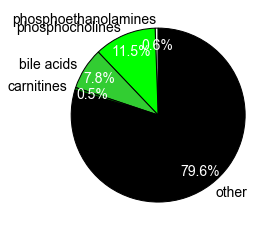

In [28]:
labels = [ "phosphoethanolamines", "phosphocholines", 'bile acids', "carnitines", "other" ]
sizes = [0.56, 11.54, 7.76,  0.52, 79.62]
colors = ["honeydew","lime", "limegreen", 'green', "k"]

import matplotlib as mpl
mpl.rcParams['font.size'] = 14

_, _, autotexts = plt.pie(sizes, labels=labels,autopct='%1.1f%%',
                          pctdistance=0.8,colors=colors, startangle=90, 
                         wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
for autotext in autotexts:
    autotext.set_color('w')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/cIHC_molecule_piechart_IHC.svg', dpi=300, bbox_inches="tight")
plt.show()

In [29]:
Airsum_total = Air_moles.values.sum()
Air_PEsum = Air_moles[PE].values.sum()
Air_PPC = Air_moles[all_cholines].values.sum()
Air_BAs = Air_moles[bile_acids].values.sum()
Air_CARN = Air_moles[carnitines].values.sum()

In [30]:
print("PE", (Air_PEsum/Airsum_total)*100)
print("PPC", (Air_PPC/Airsum_total)*100)
print("BAs", (Air_BAs/Airsum_total)*100)
print("carnitines", (Air_CARN/Airsum_total)*100)
Air_other = 1 - (Air_BAs/Airsum_total + Air_PPC/Airsum_total + Air_CARN/Airsum_total + Air_PEsum/Airsum_total)
print("Other", Air_other*100)

PE 0.13430558998735667
PPC 4.24524959526138
BAs 4.745192907437752
carnitines 0.2707079568201809
Other 90.60454395049334


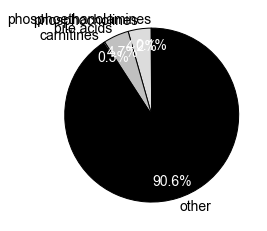

In [31]:
labels = [ "phosphoethanolamines", "phosphocholines", 'bile acids', "carnitines", "other" ]
sizes = [0.13, 4.245, 4.745,  0.271, 90.60]
colors = ["whitesmoke","gainsboro", 'silver', 'darkgrey', "k"]

import matplotlib as mpl
mpl.rcParams['font.size'] = 14

_, _, autotexts = plt.pie(sizes, labels=labels,autopct='%1.1f%%',
                          pctdistance=0.8,colors=colors, startangle=90, 
                         wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
for autotext in autotexts:
    autotext.set_color('w')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/cAir_molecule_piechart_Air.svg', dpi=300, bbox_inches="tight")
plt.show()

## IH/IC

In [ ]:
molez = ihic_metab_mols
molez.head()
#raw values

In [88]:
bile_acidz = [col for col in molez.columns if 'holic' in col]
new_bile_acidz = [col for col in molez.columns if 'cyclopenta[a]phenanthren' in col]
all_bile_acidz = bile_acidz + new_bile_acidz
all_bile_acidz

['Alanine conjugated cholic acid',
 'Cholic acid',
 'Deoxycholic acid',
 'Histidine conjugated cholic acid ',
 'Hyodeoxycholic acid',
 'Lysine conjugated cholic acid',
 'Spectral Match to 12-Ketodeoxycholic acid from NIST14',
 'Spectral Match to Cholic acid from NIST14',
 'Spectral Match to Tauroursodeoxycholic acid from NIST14',
 'Tauro-b-muricholic acid',
 'Taurocholic acid',
 'Taurodeoxycholic acid',
 'Ursodeoxycholic acid',
 'a-Muricholic acid',
 'b-Muricholic acid',
 'hyocholic acid',
 'taurocholic acid',
 'taurohyodeoxycholic acid',
 'threonine conjugated cholic acid',
 '(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid',
 '(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid',
 '(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)

In [89]:
cholinez = [col for col in molez.columns if 'choline' in col]
more_cholinez = [col for col in molez.columns if 'PC' in col]
all_cholinez = cholinez + more_cholinez
all_cholinez

['Massbank:CE000694 1-O-hexadecyl-2-C-methyl-3-phosphatidylcholine',
 'Massbank:KO003021 Glycerophosphorylcholine|Glycerophosphocholine|sn-Glycero-3-phosphocholine',
 'ReSpect:PS081304 1-Lauroyl-2-Hydroxy-sn-Glycero-3-Phosphocholine|12:0 LysoPC|1-Dodecanoyllysolecithin|Phosphocholine,1-Lauroyl-2-Hydroxy-sn-Glycero-3-',
 'Spectral Match to 1-(1Z-Hexadecenyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-(9Z-Octadecenoyl)-2-tetradecanoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Heptadecanoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecanoyl-2-(9Z-octadecenoyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecanoyl-2-octadecadienoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecanoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecyl-2-(9Z-octadecenoyl)-sn-glycero-3-phosph

In [90]:
carnitinez = [col for col in molez.columns if 'carnit' in col]
carnitinez.append("LAUROYLCARNITINE")
carnitinez

['Spectral Match to Oleoyl L-carnitine from NIST14',
 'Spectral Match to Palmitoylcarnitine from NIST14',
 'LAUROYLCARNITINE']

In [91]:
PEz = [col for col in molez.columns if 'phosphoethanolamine' in col]
PEz

['Spectral Match to 1-Myristoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14',
 'Spectral Match to 1-Palmitoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14',
 'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14']

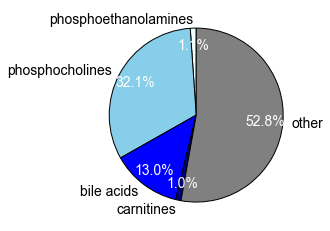

In [92]:
###IH###Blue
labels = [ "phosphoethanolamines", "phosphocholines", 'bile acids', "carnitines", "other" ]
sizes = [1.1, 32.1, 13.0,  1.0, 52.8]
colors = ["azure","skyblue", "blue", 'navy', "grey"]

import matplotlib as mpl
mpl.rcParams['font.size'] = 14

_, _, autotexts = plt.pie(sizes, labels=labels,autopct='%1.1f%%',
                          pctdistance=0.8,colors=colors, startangle=90, 
                         wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
for autotext in autotexts:
    autotext.set_color('w')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/cIHC_molecule_piechart_IHC.svg', dpi=300, bbox_inches="tight")
plt.show()

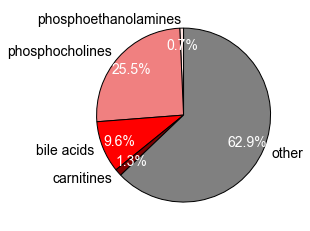

In [33]:
###IC### RED
labels = [ "phosphoethanolamines", "phosphocholines", 'bile acids', "carnitines", "other" ]
sizes = [0.7, 25.5, 9.6,  1.3, 62.8]
colors = ["mistyrose","lightcoral", 'red', 'maroon', "grey"]

import matplotlib as mpl
mpl.rcParams['font.size'] = 14

_, _, autotexts = plt.pie(sizes, labels=labels,autopct='%1.1f%%',
                          pctdistance=0.8,colors=colors, startangle=90, 
                         wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
for autotext in autotexts:
    autotext.set_color('w')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/cAir_molecule_piechart_Air.svg', dpi=300, bbox_inches="tight")
plt.show()

# Bar Charts

In [76]:
All_moles["PE"] = (All_moles[PE].sum(axis=1)/All_moles.sum(axis=1))*100
All_moles["PPC"] = (All_moles[all_cholines].sum(axis=1)/All_moles.sum(axis=1))*100
All_moles["BAs"] = (All_moles[all_bile_acids].sum(axis=1)/All_moles.sum(axis=1))*100
All_moles["carnitines"] = (All_moles[carnitines].sum(axis=1)/All_moles.sum(axis=1))*100
#IHC_other = 1 - (IHC_BAs/sum_total + IHC_PPC/sum_total + IHC_CARN/sum_total + IHC_PEsum/sum_total)
All_moles.head()

,"(2S,3S,4S,5R,6R)-6-[[(3S,4S,6aR,6bS,8aR,9R,12aS,14bR)-9-hydroxy-4-(hydroxymethyl)-4,6a,6b,8a,11,11,14b-heptamethyl-1,2,3,4a,5,6,7,8,9,10,12,12a,14,14a-tetradecahydropicen-3-yl]oxy]-5-[(2S,3R,4S,5R,6R)-4,5-dihydroxy-6-(hydroxymethyl)-3-[(2S,3R,4R,5R,6S)-3,4,5-trihydroxy-6-methyloxan-2-yl]oxyoxan-2-yl]oxy-3,4-dihydroxyoxane-2-carboxylic acid","(2S,4R)-4-((3R,5S,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)-2-hydroxypentanoic acid","(4R)-4-((1R,3S,5S,7R,9S,10S,12S,13R,14S,17R)-1,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6R,7S,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6R,7S,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4aR,5S)-9,9a-dihydroxy-3,4a,5-trimethyl-5,6,7,8,8a,9-hexahydro-4H-benzo[f][1]benzofuran-2-one","(R)-4-((3R,5R,8R,9S,10S,12S,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pent-2-enoic acid",...,"methyl (4R)-4-((3R,5S,7R,9S,10S,13R,15R,17R)-3,7,15-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoate",sphingosin C16 (Artifact)-emf,taurocholic acid,taurohyodeoxycholic acid,tauroursodeoxycholic acid,exposure_type,PE,PPC,BAs,carnitines
A15_85_15,4.347014e+06,4.365013e+05,3.113129e+06,7.643170e+06,8.333160e+06,3.105617e+07,1.764193e+07,1.316531e+07,29758.827594,6.768136e+06,...,1.189346e+07,4.386402e+07,8.742650e+05,2.131643e+05,0.000000,Air,0.057433,2.599374,0.830003,0.116975
A15_86_01,6.162584e+06,1.929600e+07,9.248853e+06,1.671268e+07,3.592560e+07,1.598971e+08,1.184836e+08,1.029479e+08,70848.402187,3.520016e+07,...,1.454446e+08,3.501207e+07,1.957585e+06,5.283425e+06,80722.124555,Air,0.098305,0.381724,5.302870,0.058408
A15_86_15,3.773914e+06,1.334396e+05,7.236250e+05,3.936169e+06,1.475118e+07,1.376922e+07,4.943581e+06,2.040354e+07,34407.511004,7.293671e+06,...,8.638876e+06,5.019532e+07,6.688261e+05,3.792855e+04,0.000000,Air,0.012539,1.158787,1.431360,0.058290
A15_85_10,3.006859e+07,1.703983e+06,6.540154e+06,8.387228e+06,8.639797e+06,2.926899e+07,3.393049e+07,6.837407e+07,0.000000,2.277938e+07,...,2.476160e+07,3.164700e+07,4.734618e+05,4.367727e+05,0.000000,Air,0.031225,0.211002,2.353028,0.025202
A15_86_10,6.716596e+06,1.667015e+05,5.333426e+06,1.054720e+07,2.291112e+07,1.192051e+07,8.587482e+06,6.986774e+07,145728.305689,2.414387e+07,...,1.750634e+07,3.345745e+07,4.218966e+05,4.714934e+05,0.000000,Air,0.013823,0.267860,2.270260,0.081170


In [77]:
group_moles = All_moles[['PE', 'PPC', 'BAs', 'carnitines', 'exposure_type']].copy()
group_moles.head()

,PE,PPC,BAs,carnitines,exposure_type
A15_85_15,0.057433,2.599374,0.830003,0.116975,Air
A15_86_01,0.098305,0.381724,5.302870,0.058408,Air
A15_86_15,0.012539,1.158787,1.431360,0.058290,Air
A15_85_10,0.031225,0.211002,2.353028,0.025202,Air
A15_86_10,0.013823,0.267860,2.270260,0.081170,Air


In [78]:
group_moles2 = group_moles.reset_index()
group_moles2.head()

,index,PE,PPC,BAs,carnitines,exposure_type
0,A15_85_15,0.057433,2.599374,0.830003,0.116975,Air
1,A15_86_01,0.098305,0.381724,5.302870,0.058408,Air
2,A15_86_15,0.012539,1.158787,1.431360,0.058290,Air
3,A15_85_10,0.031225,0.211002,2.353028,0.025202,Air
4,A15_86_10,0.013823,0.267860,2.270260,0.081170,Air


In [79]:
group_moles3 = group_moles2.melt(id_vars=['index', 'exposure_type'])
group_moles3.set_index('index', inplace=True)
group_moles3 

,exposure_type,variable,value
index,,,
A15_85_15,Air,PE,0.057433
A15_86_01,Air,PE,0.098305
A15_86_15,Air,PE,0.012539
A15_85_10,Air,PE,0.031225
A15_86_10,Air,PE,0.013823
...,...,...,...
A23_120_15,Air,carnitines,0.483045
A23_120_01,Air,carnitines,0.087546
A23_119_20,Air,carnitines,0.359228


In [112]:
group_moles3.sort_values(by=['exposure_type', 'variable'], inplace=True)

In [132]:
group_moles_big = group_moles3[group_moles3.variable.isin(['BAs', 'PPC'])]
group_moles_small = group_moles3[group_moles3.variable.isin(['PE', 'carnitines'])]

In [133]:
from statannot import add_stat_annotation

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PPC_Air v.s. PPC_IHC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.175e-09 U_stat=1.645e+03
BAs_Air v.s. BAs_IHC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.236e-04 U_stat=2.335e+03


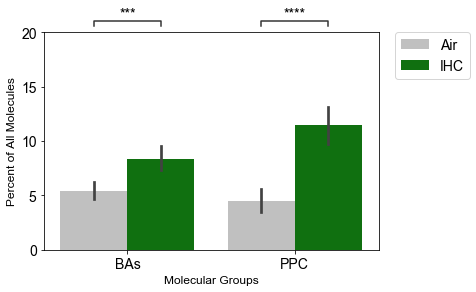

In [148]:
ax = sns.barplot(x="variable", y="value", hue='exposure_type', 
            palette=['silver', 'green'], data=group_moles_big)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Percent of All Molecules', fontsize=12)
plt.xlabel('Molecular Groups', fontsize=12)
plt.ylim(0, 20)

box_pairs = [((col, 'Air'), (col, 'IHC')) for col in group_moles_big['variable'].unique()]
add_stat_annotation(ax, plot='barplot', data=group_moles_big, x="variable", y="value", hue='exposure_type',
                    box_pairs=box_pairs, test='Mann-Whitney', loc='outside', verbose=2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHC_molecule_group_barchart_big.svg', dpi=300, bbox_inches="tight")
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

carnitines_Air v.s. carnitines_IHC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.657e-04 U_stat=2.319e+03
PE_Air v.s. PE_IHC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.360e-11 U_stat=1.379e+03


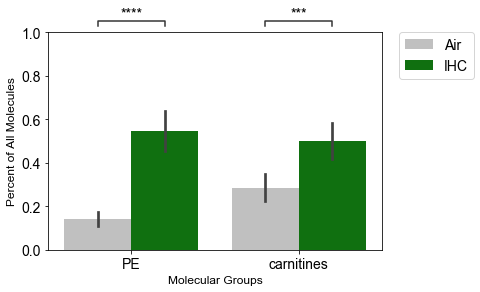

In [145]:
ax = sns.barplot(x="variable", y="value", hue='exposure_type', 
            palette=['silver', 'green'], data=group_moles_small)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Percent of All Molecules', fontsize=12)
plt.xlabel('Molecular Groups', fontsize=12)
plt.ylim(0, 1)

box_pairs = [((col, 'Air'), (col, 'IHC')) for col in group_moles_small['variable'].unique()]
add_stat_annotation(ax, plot='barplot', data=group_moles_small, x="variable", y="value", hue='exposure_type',
                    box_pairs=box_pairs, test='Mann-Whitney', loc='outside', verbose=2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHC_molecule_group_barchart_small.svg', dpi=300, bbox_inches="tight")
plt.show()

# IH/IC

In [82]:
molez = ihic_metab_mols
molez.head()
#raw values

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,Ursodeoxycholic acid,a-Muricholic acid,b-Muricholic acid,gmelinol,hyocholic acid,sphingosin C16 (Artifact)-emf,taurocholic acid,taurohyodeoxycholic acid,threonine conjugated cholic acid,xanthohumol
A36_144_2,1.002163e+08,1.856405e+07,8.463912e+06,3.319759e+06,1.265182e+07,3.785004e+06,3.230452e+07,3.859170e+07,19028.101518,5.889367e+05,...,5.447380e+05,4.754706e+07,2.599903e+07,2.206346e+06,1.011364e+06,2.786164e+07,4.396711e+06,1.011104e+06,48608.258212,8.429734e+06
A36_145_2,1.123705e+08,2.344882e+07,9.693180e+06,7.968814e+06,1.138696e+07,1.036950e+07,3.874929e+07,2.371343e+07,38995.306094,5.514609e+05,...,7.017376e+05,9.751392e+07,5.984692e+07,1.907400e+06,3.057336e+06,8.443697e+06,9.618206e+06,1.340127e+06,319393.855140,4.012935e+06
A36_146_2,1.122715e+08,2.633132e+07,1.179041e+07,5.038230e+06,9.808144e+06,2.777913e+06,3.864718e+07,3.634443e+07,42455.039250,4.033666e+05,...,1.914244e+06,7.573564e+07,4.551782e+07,3.134868e+06,2.846551e+06,2.811215e+07,6.517472e+06,1.309515e+06,89796.334025,4.977158e+06
A36_145_1,3.022880e+07,9.842834e+06,4.894182e+06,9.553708e+05,5.234213e+06,5.836308e+05,6.675492e+06,1.298713e+07,0.000000,1.257660e+07,...,1.119788e+05,2.866872e+07,7.867828e+06,2.524832e+07,8.514613e+05,2.995528e+07,2.123593e+06,2.603801e+05,50797.715572,1.147515e+07
A35_139_1,3.152146e+07,3.591568e+06,4.238519e+05,6.711237e+05,9.099309e+05,4.790608e+06,6.024970e+06,8.889273e+06,0.000000,1.964680e+07,...,3.306013e+04,3.578768e+07,4.911409e+06,4.718870e+07,8.895797e+05,2.859685e+07,3.693999e+06,8.645017e+05,63631.407920,1.386217e+07


In [86]:
All_molez = pd.merge(molez, ihic_metab_md['exposure_type'], left_index=True, right_index=True)

In [93]:
All_molez["PE"] = (All_molez[PEz].sum(axis=1)/All_molez.sum(axis=1))*100
All_molez["PPC"] = (All_molez[all_cholinez].sum(axis=1)/All_molez.sum(axis=1))*100
All_molez["BAs"] = (All_molez[all_bile_acidz].sum(axis=1)/All_molez.sum(axis=1))*100
All_molez["carnitines"] = (All_molez[carnitinez].sum(axis=1)/All_molez.sum(axis=1))*100
#IHC_other = 1 - (IHC_BAs/sum_totalz + IHC_PPC/sum_totalz + IHC_CARN/sum_totalz + IHC_PEsum/sum_totalz)
All_molez.head()

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,sphingosin C16 (Artifact)-emf,taurocholic acid,taurohyodeoxycholic acid,threonine conjugated cholic acid,xanthohumol,exposure_type,PE,PPC,BAs,carnitines
A36_144_2,1.002163e+08,1.856405e+07,8.463912e+06,3.319759e+06,1.265182e+07,3.785004e+06,3.230452e+07,3.859170e+07,19028.101518,5.889367e+05,...,2.786164e+07,4.396711e+06,1.011104e+06,48608.258212,8.429734e+06,IH,0.123578,9.123538,6.343203,0.687512
A36_145_2,1.123705e+08,2.344882e+07,9.693180e+06,7.968814e+06,1.138696e+07,1.036950e+07,3.874929e+07,2.371343e+07,38995.306094,5.514609e+05,...,8.443697e+06,9.618206e+06,1.340127e+06,319393.855140,4.012935e+06,IH,0.152010,16.659530,7.703192,0.768468
A36_146_2,1.122715e+08,2.633132e+07,1.179041e+07,5.038230e+06,9.808144e+06,2.777913e+06,3.864718e+07,3.634443e+07,42455.039250,4.033666e+05,...,2.811215e+07,6.517472e+06,1.309515e+06,89796.334025,4.977158e+06,IH,0.076381,23.669486,7.396871,0.522081
A36_145_1,3.022880e+07,9.842834e+06,4.894182e+06,9.553708e+05,5.234213e+06,5.836308e+05,6.675492e+06,1.298713e+07,0.000000,1.257660e+07,...,2.995528e+07,2.123593e+06,2.603801e+05,50797.715572,1.147515e+07,IH,0.060955,1.438186,2.037621,0.029263
A35_139_1,3.152146e+07,3.591568e+06,4.238519e+05,6.711237e+05,9.099309e+05,4.790608e+06,6.024970e+06,8.889273e+06,0.000000,1.964680e+07,...,2.859685e+07,3.693999e+06,8.645017e+05,63631.407920,1.386217e+07,Air,0.073537,1.693671,1.410151,0.095377


In [95]:
group_molez = All_molez[['PE', 'PPC', 'BAs', 'carnitines', 'exposure_type']].copy()
group_molez.head()

,PE,PPC,BAs,carnitines,exposure_type
A36_144_2,0.123578,9.123538,6.343203,0.687512,IH
A36_145_2,0.152010,16.659530,7.703192,0.768468,IH
A36_146_2,0.076381,23.669486,7.396871,0.522081,IH
A36_145_1,0.060955,1.438186,2.037621,0.029263,IH
A35_139_1,0.073537,1.693671,1.410151,0.095377,Air


In [96]:
group_molez2 = group_molez.reset_index()
group_molez2.head()

,index,PE,PPC,BAs,carnitines,exposure_type
0,A36_144_2,0.123578,9.123538,6.343203,0.687512,IH
1,A36_145_2,0.152010,16.659530,7.703192,0.768468,IH
2,A36_146_2,0.076381,23.669486,7.396871,0.522081,IH
3,A36_145_1,0.060955,1.438186,2.037621,0.029263,IH
4,A35_139_1,0.073537,1.693671,1.410151,0.095377,Air


In [97]:
group_molez3 = group_molez2.melt(id_vars=['index', 'exposure_type'])
group_molez3.set_index('index', inplace=True)
group_molez3 

,exposure_type,variable,value
index,,,
A36_144_2,IH,PE,0.123578
A36_145_2,IH,PE,0.152010
A36_146_2,IH,PE,0.076381
A36_145_1,IH,PE,0.060955
A35_139_1,Air,PE,0.073537
...,...,...,...
A42_167_1,IC,carnitines,0.047780
A42_168_1,IC,carnitines,0.050291
A41_166_1,IC,carnitines,0.035378


In [114]:
group_molez3.sort_values(by=['exposure_type', 'variable'], inplace=True)

In [128]:
group_molez_big = group_molez3[group_molez3.variable.isin(['BAs', 'PPC'])]
group_molez_small = group_molez3[group_molez3.variable.isin(['PE', 'carnitines'])]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PPC_IC v.s. PPC_IH: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.857e-01 U_stat=4.026e+03
BAs_Air v.s. BAs_IC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.466e-06 U_stat=2.416e+03
PPC_Air v.s. PPC_IC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.370e-07 U_stat=2.259e+03
BAs_IC v.s. BAs_IH: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.074e-02 U_stat=3.656e+03
PPC_Air v.s. PPC_IH: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.016e-07 U_stat=2.126e+03
BAs_Air v.s. BAs_IH: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.686e-08 U_stat=2.019e+03


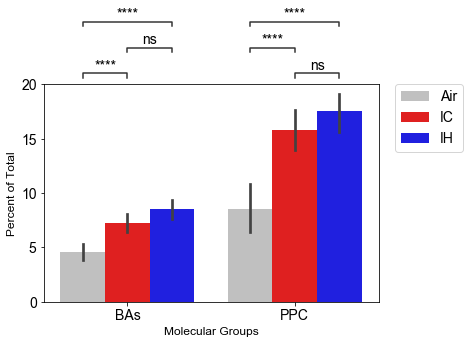

In [146]:
ax = sns.barplot(x="variable", y="value", hue='exposure_type', 
            palette=['silver', 'red', 'blue'], data=group_molez_big)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Percent of Total', fontsize=12)
plt.xlabel('Molecular Groups', fontsize=12)
plt.ylim(0, 20)

box_pairs1 = [((col, 'Air'), (col, 'IH')) for col in group_molez_big['variable'].unique()]
box_pairs2 = [((col, 'Air'), (col, 'IC')) for col in group_molez_big['variable'].unique()]
box_pairs3 = [((col, 'IH'), (col, 'IC')) for col in group_molez_big['variable'].unique()]
box_pairs = box_pairs1 + box_pairs2 + box_pairs3
add_stat_annotation(ax, plot='barplot', data=group_molez_big, x="variable", y="value", hue='exposure_type',
                    box_pairs=box_pairs, test='Mann-Whitney', loc='outside', verbose=2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHIC_molecule_group_barchart_big.svg', dpi=300, bbox_inches="tight")
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

carnitines_IC v.s. carnitines_IH: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.909e-02 U_stat=3.523e+03
PE_Air v.s. PE_IC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.246e-04 U_stat=2.695e+03
carnitines_Air v.s. carnitines_IC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.806e-02 U_stat=3.159e+03
PE_IC v.s. PE_IH: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.783e-05 U_stat=6.372e+03
carnitines_Air v.s. carnitines_IH: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.427e-04 U_stat=2.628e+03
PE_Air v.s. PE_IH: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.237e-01 U_stat=3.486e+03


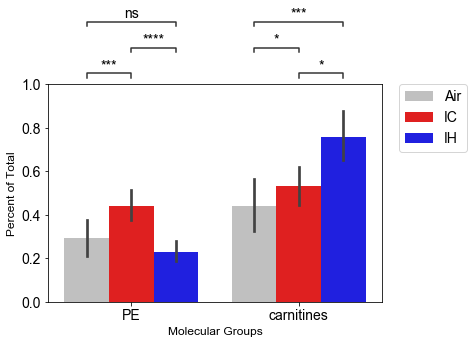

In [147]:
ax = sns.barplot(x="variable", y="value", hue='exposure_type', 
            palette=['silver', 'red', 'blue'], data=group_molez_small)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Percent of Total', fontsize=12)
plt.xlabel('Molecular Groups', fontsize=12)
plt.ylim(0, 1)

box_pairs1 = [((col, 'Air'), (col, 'IH')) for col in group_molez_small['variable'].unique()]
box_pairs2 = [((col, 'Air'), (col, 'IC')) for col in group_molez_small['variable'].unique()]
box_pairs3 = [((col, 'IH'), (col, 'IC')) for col in group_molez_small['variable'].unique()]
box_pairs = box_pairs1 + box_pairs2 + box_pairs3
add_stat_annotation(ax, plot='barplot', data=group_molez_small, x="variable", y="value", hue='exposure_type',
                    box_pairs=box_pairs, test='Mann-Whitney', loc='outside', verbose=2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHIC_molecule_group_barchart_small.svg', dpi=300, bbox_inches="tight")
plt.show()